### The Perceptron Learning Algorithm

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import chart_studio.plotly as py
import plotly.graph_objs as go

class PLA():
    """
    Perceptron Learning Algorithm model
    """
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], 1))
        converged = False
        self.n_iters = 0
        while not converged:
            converged = True
            idx = np.random.permutation(len(y)) # loop through random indices of input matrix
            for i in idx:
                xi = X[i]
                yi = y[i]
                if yi * (xi @ self.w) <= 0:
                    converged = False
                    self.n_iters += 1
                    self.w += (yi*xi).reshape(-1,1)
                    
    def predict(self, X):
        return np.sign((X @ self.w)).squeeze()
    
def error(y_true, y_pred):
    # return proportion of error
    return np.sum(y_true != y_pred) / len(y_true)

def generate_line(x_min, x_max, vec_size):
    """
    Generate a random line with corresponding coefficient and intercept
    """
    
    line_points = np.random.uniform(x_min, x_max, [vec_size, vec_size])
    line_coef = (line_points[1,1] - line_points[0, 1])/(line_points[1,0] - line_points[0, 0]) # the slope m = (y1-y0)/(x1-x0)
    line_intercept = line_points[0,1] - line_coef*line_points[0,0]  # the slope m = (y1-y0)/(x1-x0)
    return line_coef, line_intercept

def generate_data(N, line_coef, line_intercept):
    """
    Generate random data given number of points, a line coefficient and intercept. Generated points will be in +1/-1 class regarding their relative position to the line.
    
    Inputs:
    - N: number of points to be generated
    - line_coef: line's coefficient
    - line_intercept: line's intercept
    
    Outputs: a tuple of 2 variables:
    - X: positions of generated points
    - y: classes of points (+1/-1)
    """
    
    X = np.random.uniform(-1, 1, [N, 2])
    y = X[:, 1] - X[:, 0] * line_coef - line_intercept >= 0
    y = np.where(y, 1, -1)
    if np.abs(np.sum(y)) == len(y):
        X, y = generate_data(N, line_coef, line_intercept)
    return X, y

def create_plotly_graph(train_data, mid_line, beg_line, Title):
    
    line_data = train_data
    
    #train_data.y = train_data.x * line_data_coef + line_intrcpt
    trace1 =go.Scatter(
                    x = train_data.x1,
                    y = train_data.x2,
                    mode = "markers",
                    marker = dict(color = train_data.y, size = 15),
                    text= 'Raw data')
    trace2 =go.Scatter(
                    x = train_data.x1,
                    y = train_data.new_x2,
                    mode = "lines",
                    name = "Final Perceptron_classifier",
                    line = dict(color = 'black', width=4, dash = 'solid'),
                    text= 'Raw data')
    
    trace3 =go.Scatter(
                    x = mid_line.x1,
                    y = mid_line.x2,
                    mode = "lines",
                    name = "Mid Perceptron_classifier",
                    line = dict(color = 'blue', width=4, dash = 'dash'),
                    text= 'Raw data')

    trace4 =go.Scatter(
                    x = beg_line.x1,
                    y = beg_line.x2,
                    mode = "lines",
                    name = "Beginning Perceptron_classifier",
                    line = dict(color = 'lightblue', width=4, dash = 'dash'),
                    text= 'Raw data')
        
    layout = dict(title = Title,
                  xaxis= dict(title= 'x1',ticklen= 0,zerolinecolor='lightgray',zeroline= True),
                  yaxis= dict(title= 'x2',ticklen= 5,zerolinecolor='lightgray',zeroline= True),
                  width = 1200,height = 800
                 )
    data = [trace1,trace2,trace3,trace4]
    fig = dict(data = data, layout = layout)
    iplot(fig)

#df["y"] = df["y"].astype(str)
#fig = px.scatter(df, x="total_bill", y="tip", color="y",

### Parameters and Functions

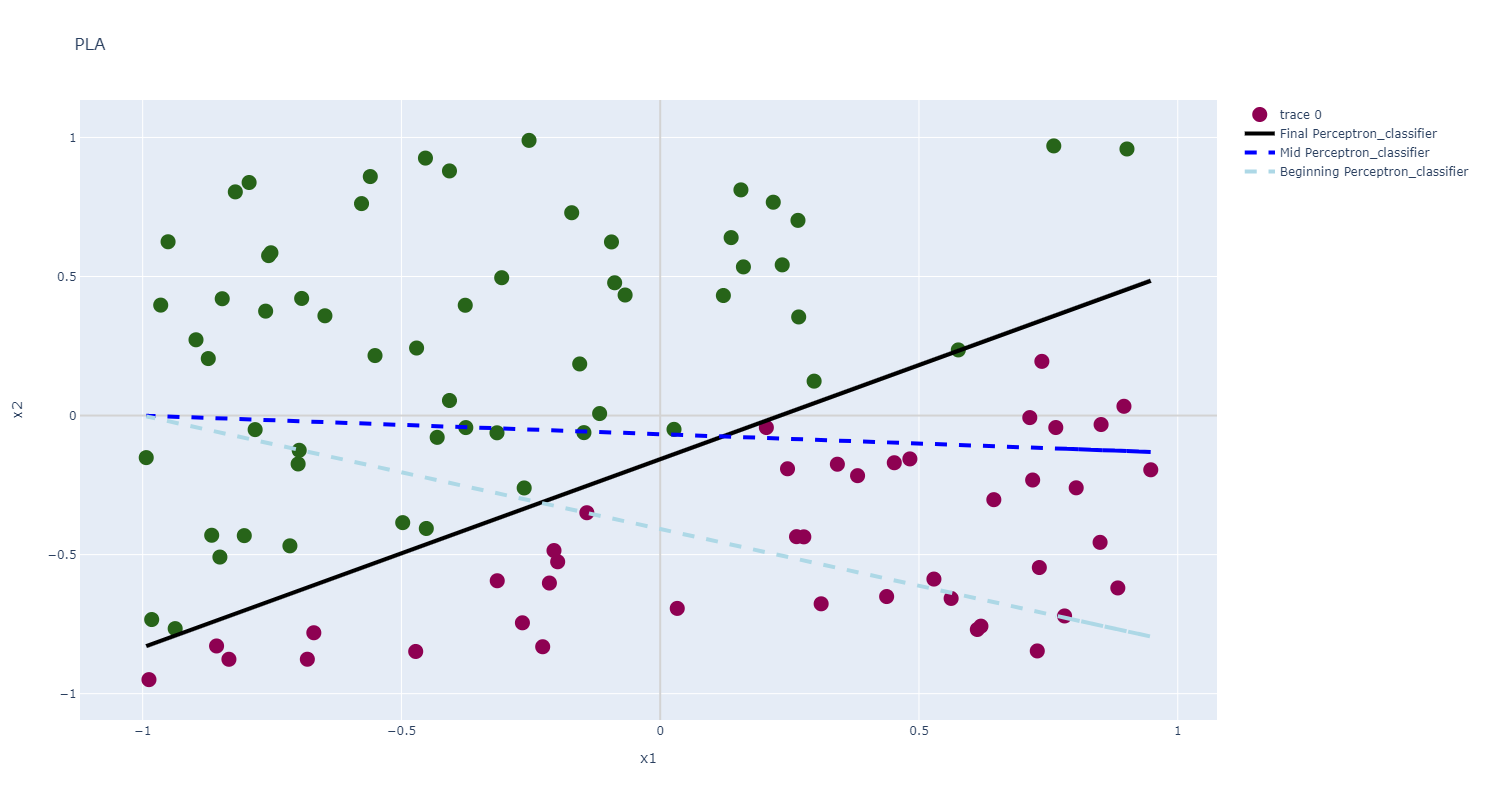

Average number of iterations till converged: 100.984
Average proportion of error: 0.013


In [9]:
#random.seed = (1000)
train_nr = 100 # number of points
test_nr = 100 # number of points
runs_nr = 1000 # of iterations
mid = int(runs_nr / 2)
x_min = -1 # lower bound
x_max = 1 # Higher bound
dimension = 2
iters = []
errors = []
line_data = pd.DataFrame(columns=['coef','intercept'])

for i in range(runs_nr):
    coef, intercept = generate_line(x_min = x_min, x_max = x_max, vec_size = dimension)  # generate line's params
    line_data = line_data.append({'coef': coef, 'intercept': intercept}, ignore_index=True)
    X_train, y_train = generate_data(train_nr, coef, intercept)
    X_data = X_train
    X_train = np.hstack((np.ones((len(X_train),1)), X_train))  # add dummy x0 columns
    
    # test data
    X_test, y_test = generate_data(test_nr, coef, intercept)
    X_test = np.hstack((np.ones((len(X_test),1)), X_test))
    
    # PLA model
    pla = PLA()
    pla.fit(X_train, y_train)
    iters.append(pla.n_iters)
    pred = pla.predict(X_test)
    errors.append(error(y_test, pred))

tmp = np.transpose(y_train)
    
df = pd.DataFrame(columns=['x1','x2','y'])
df1 = pd.DataFrame(columns=['x1','x2'])
df2 = pd.DataFrame(columns=['x1','x2'])

for i in range(len(X_data)):
    df.at[i, 'x1'] = X_train[i][1]
    df1.at[i, 'x1'] = X_train[i][1]
    df2.at[i, 'x1'] = X_train[i][1]
    df.at[i, 'x2'] = X_train[i][2]
    df.at[i, 'y'] = tmp[i]
    
df2['x2'] = df.x1 * line_data.iloc[0][0] + line_data.iloc[0][0] # 1st line
df['new_x2'] = df.x1 * coef + intercept # final line
df1['x2'] = df.x1 * line_data.iloc[mid][0] + line_data.iloc[mid][0] # mid line

gr = create_plotly_graph(train_data = df, mid_line = df1, beg_line = df2, Title = "PLA")
print("Average number of iterations till converged: {}".format(np.mean(iters)))
print("Average proportion of error: {:.3f}".format(np.mean(errors)))